In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
data =pd.read_csv("villes.csv", sep=";")
X = data.iloc[:,1:13].values
labels = data.iloc[:,0].values

In [3]:
#ANalyse en composantes pricipales
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
SS = StandardScaler()
SS.fit(X)
X_SS = SS.transform(X)

In [5]:
pca = PCA(n_components=0.9)
pca.fit(X_SS)
X_pca = pca.transform(X_SS)



# Axe 1 donne une moyenne des températures
# Axe2: corrélé positivement avec la température en hiver et negativement avec la température en été

In [8]:
pca.components_

array([[ 0.27151028,  0.28846164,  0.3010811 ,  0.30354174,  0.28353089,
         0.27841907,  0.27290295,  0.28757774,  0.30472022,  0.3038548 ,
         0.29242808,  0.2729549 ],
       [ 0.39933494,  0.29907184,  0.12943051, -0.11530598, -0.32314291,
        -0.35846763, -0.38879639, -0.3010133 , -0.11231622,  0.12249226,
         0.26269461,  0.38693688]])

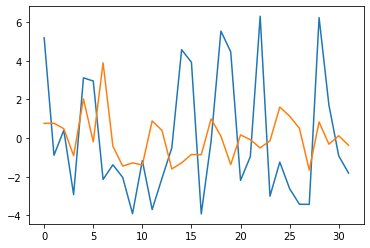

In [6]:
plt.plot(X_pca)

In [72]:
data.columns

Index(['ville', 'janv', 'fev', 'mars', 'avril', 'mai', 'juin', 'juil', 'aout',
       'sept', 'oct', 'nov', 'dec'],
      dtype='object')

In [73]:
data.shape

(32, 13)

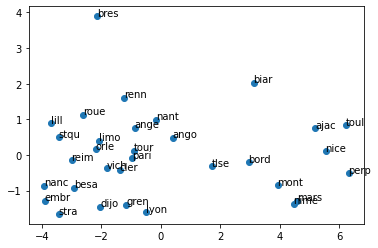

In [74]:
import matplotlib
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [10]:
#CRIME
data2 = pd.read_csv("crimes.csv", sep=";")
data2.head()

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [11]:
X = data2.iloc[:,1:8]
labels = data2.iloc[:,0]



In [12]:
SS.fit(X)
X_SS = SS.transform(X)
pca = PCA(n_components=0.9)
pca.fit(X_SS)
X_pca = pca.transform(X_SS)

In [13]:

pca.components_

array([[ 0.30027916,  0.43175936,  0.39687549,  0.3966517 ,  0.44015721,
         0.35735953,  0.29517681],
       [-0.62917444, -0.16943512,  0.04224698, -0.34352815,  0.20334059,
         0.40231912,  0.50242093],
       [ 0.1782453 , -0.24419758,  0.49586087, -0.06950972, -0.20989509,
        -0.53923144,  0.56838373],
       [-0.23211411,  0.06221567, -0.55798926,  0.62980445, -0.05755491,
        -0.23488987,  0.41923832]])

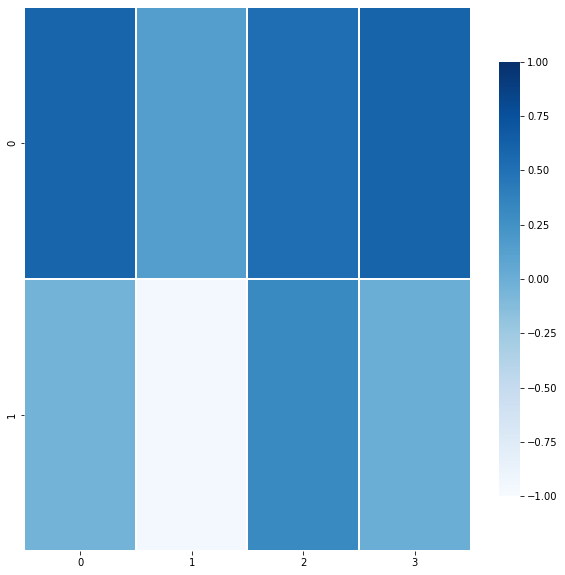

In [158]:
import seaborn as snp
fig, ax = plt.subplots(figsize=(10,10))
snp.heatmap(pca.components_, cmap="Blues", vmin= -1, vmax=1,
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()




<h1> Axe1: moyenne des crimes sélectionnés </h1>
<h1>  Axe2: corrélé negativement avec les meurtres et attaques, positivement avec Larcin et Auto-theft </h1>
<h1>  Axe3: fortement positivement avec vol et auto theft et negatif avec larcins </h1>
<h1>  Axe4: fortement negativement avec vol et fortement positivement attaque et auto theft </h1>

In [105]:
Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]




Text(0.5, 0, 'Third PC')

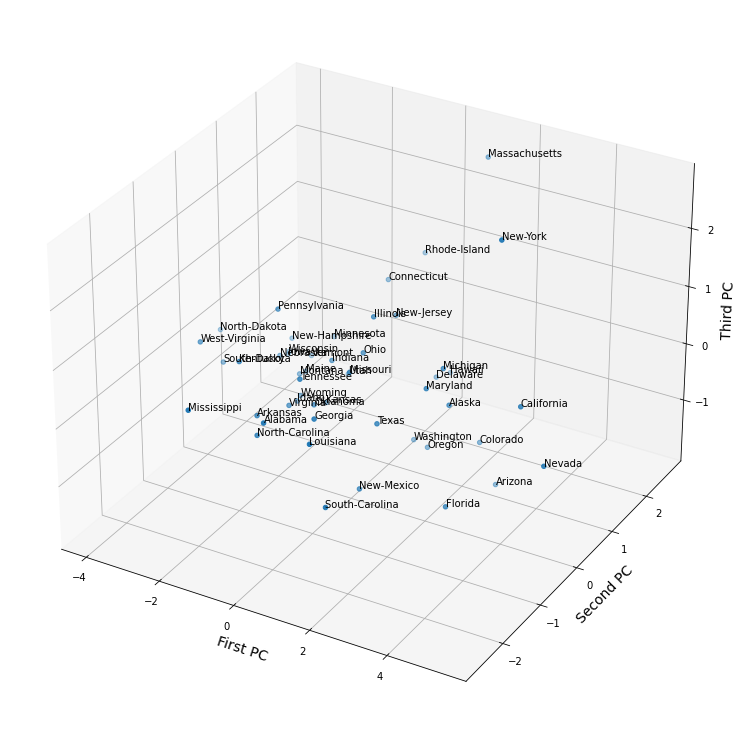

In [106]:
from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure(1,figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:,2])
for label, x, y,z in zip(labels, X_pca[:, 0], X_pca[:, 1], X_pca[:,2]):
    ax.text(x,y,z,label)
ax.set_xlabel("First PC", fontsize=14)
ax.set_ylabel("Second PC", fontsize=14)
ax.set_zlabel("Third PC", fontsize=14)


START UP


In [15]:
data3 = pd.read_csv("50_Startups.csv", sep=";")
data3.head()

,Id,Depenses R&D,Depenses Administration,Depenses Marketing Spend,Benefice
0,1,165349.20,136897.80,471784.10,192261.83
1,2,162597.70,151377.59,443898.53,191792.06
2,3,153441.51,101145.55,407934.54,191050.39
3,4,144372.41,118671.85,383199.62,182901.99
4,5,142107.34,91391.77,366168.42,166187.94


In [16]:
X = data3.iloc[:,1:5]
labels = data3.iloc[:,0]



In [17]:
SS.fit(X)
X_SS = SS.transform(X)
pca = PCA(n_components=0.9)
pca.fit(X_SS)
X_pca = pca.transform(X_SS)


In [18]:
pca.ncomponents

array([[ 0.59347855,  0.14737886,  0.52064694,  0.59580992],
       [-0.04048087, -0.95051314,  0.30797098,  0.00632069]])

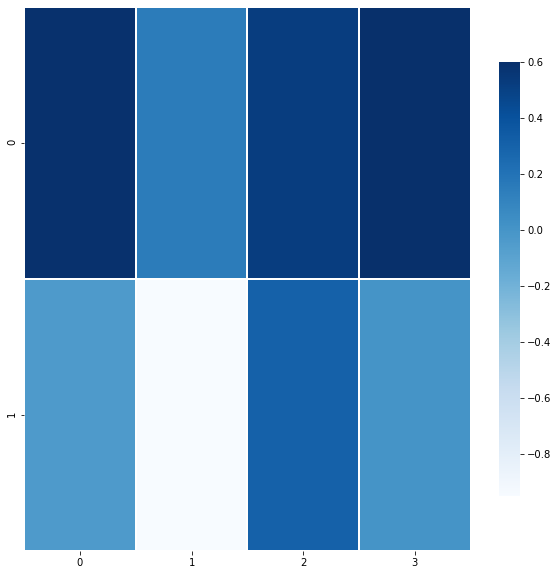

In [19]:
import seaborn as snp
fig, ax = plt.subplots(figsize=(10,10))
snp.heatmap(pca.components_, cmap="Blues", vmin=-0.95, vmax=0.6,
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

# Axe1: corrélé positivement avec les depenses R&D, marketing, et benefices
# Axe2: corrélé negativement avec depense adminstration et positivement (de maniere moins importante) avec les dépenses administrations

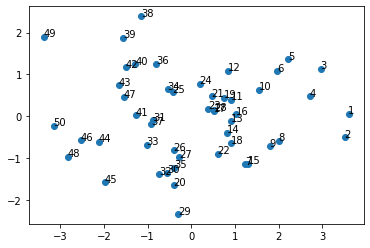

In [120]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(labels, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

Exercice 2

In [131]:
from sklearn.cluster import KMeans
data =pd.read_csv("villes.csv", sep=";")
X = data.iloc[:,1:13].values
labels = data.iloc[:,0].values
SS = StandardScaler()
SS.fit(X)
X_SS = SS.transform(X)

In [132]:
pca = PCA(n_components=0.9)
pca.fit(X_SS)
X_pca = pca.transform(X_SS)

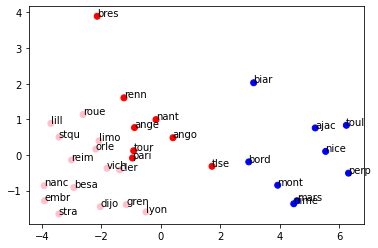

In [144]:
clustering = KMeans(n_clusters=3, random_state=3).fit(X).labels_
colors = ['red','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

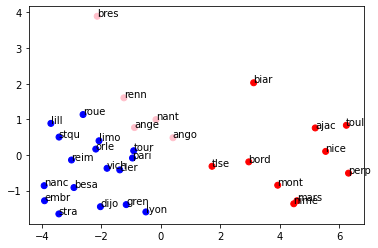

In [145]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X).labels_
colors = ['red','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

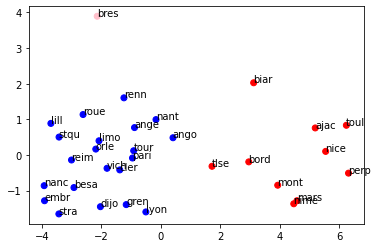

In [146]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X).labels_
colors = ['red','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()


In [148]:
from sklearn.metrics import silhouette_score
from sklearn import metrics
for i in np.arange(2, 6):
    clustering = KMeans(n_clusters=i).fit_predict(X)
    print(metrics.silhouette_score(X, clustering,metric='euclidean'))
print()

0.6181156437258204
0.40912000832289414
0.34071480805834065
0.33116954226736833



Le choix du nombre de clusters par la methode du k-means se base sur la valeur du score silhouette, on choisirait 
donc pour ce dataset un nombre de clusters = 3